In [1]:
import pandas as pd

pr = pd.DataFrame({
    "poc_rokov": [4, 7, 9, 12, 3, 5, 11, 21, 1, 14],
    "prijem": [32, 54, 64, 70, 36, 41, 59, 90, 20, 79]
})

pr

,poc_rokov,prijem
0,4,32
1,7,54
2,9,64
3,12,70
4,3,36
5,5,41
6,11,59
7,21,90
8,1,20
9,14,79


In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(pr["poc_rokov"].values.reshape(-1, 1), pr["prijem"].values)

LinearRegression()

In [3]:
pr["predicted"] = model.predict(pr["poc_rokov"].values.reshape(-1, 1))
pr

,poc_rokov,prijem,predicted
0,4,32,37.802821
1,7,54,48.460595
2,9,64,55.565777
3,12,70,66.223551
4,3,36,34.250230
5,5,41,41.355412
6,11,59,62.670960
7,21,90,98.196872
8,1,20,27.145048
9,14,79,73.328734


<AxesSubplot:xlabel='poc_rokov', ylabel='prijem'>

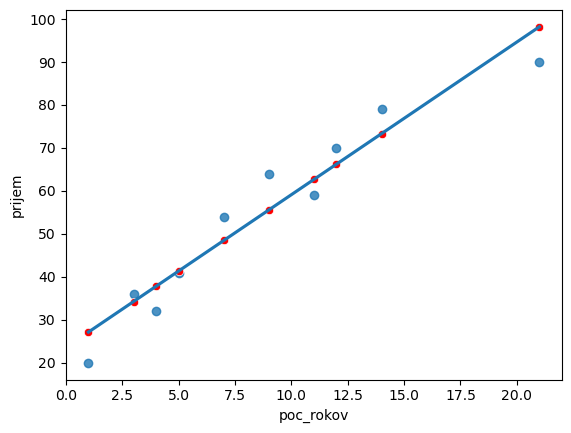

In [4]:
import seaborn as sns

sns.regplot(x=pr["poc_rokov"], y=pr["prijem"], ci=None)
sns.scatterplot(x=pr["poc_rokov"],y=pr["predicted"], c="red" )

In [5]:
pr1 = pd.DataFrame({
    "poc_rokov": [10, 15, 20]
})

pr1["prijem"] = model.predict(pr1["poc_rokov"].values.reshape(-1, 1))
pr1

,poc_rokov,prijem
0,10,59.118369
1,15,76.881325
2,20,94.644281


In [6]:
state = pd.read_csv("https://peter.butka.website.tuke.sk/res/state.csv")
state.head()

,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


In [7]:
model2 = LinearRegression()

model2.fit(state[["Illiteracy", "Life.Exp"]], state["Murder"])

LinearRegression()

In [8]:
state["Murder_predict"] = model2.predict(state[["Illiteracy", "Life.Exp"]])
state.head()

,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Murder_predict
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,12.300166
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,10.545186
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,9.306608
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,9.362270
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361,5.935944


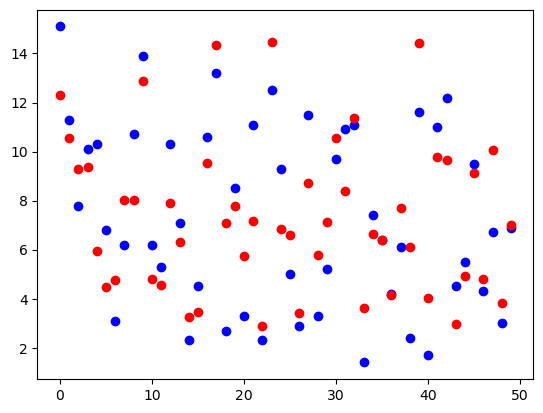

In [9]:
import matplotlib.pyplot as plt

plt.scatter(state.index, state["Murder"], color="blue", marker="o")
plt.scatter(state.index, state["Murder_predict"], color="red", marker="o")


In [10]:
print(model2.coef_)
print(model2.intercept_)

[ 2.25565118 -1.54457556]
114.2162413660695


In [ ]:
# Vypíšte sumár vytvoreného modelu s názvom model2
# nevim co chcete

In [11]:
CO2 = pd.read_csv("https://peter.butka.website.tuke.sk/res/CO2.csv")

In [12]:
del CO2["Plant"]

In [13]:
CO2

,Unnamed: 0,Type,Treatment,conc,uptake
0,1,Quebec,nonchilled,95,16.0
1,2,Quebec,nonchilled,175,30.4
2,3,Quebec,nonchilled,250,34.8
3,4,Quebec,nonchilled,350,37.2
4,5,Quebec,nonchilled,500,35.3
...,...,...,...,...,...
79,80,Mississippi,chilled,250,17.9
80,81,Mississippi,chilled,350,17.9
81,82,Mississippi,chilled,500,17.9
82,83,Mississippi,chilled,675,18.9


In [14]:
train_data = CO2.sample(frac=0.7)

test_data = CO2.drop(train_data.index)


In [58]:
train_data.Type[0]

'Quebec'

In [60]:
type_unique = pd.unique(train_data.Type)

train_data["Type"] = train_data.apply(lambda row: 0 if row["Type"] == type_unique[0] else 1 , axis=1)
test_data["Type"] = test_data.apply(lambda row: 0 if row["Type"] == type_unique[0] else 1 , axis=1)

In [65]:
test_data["Type"] = test_data.apply(lambda row: 0 if row["Type"] == type_unique[0] else 1 , axis=1)

In [62]:
from sklearn.tree import DecisionTreeClassifier

co2_tree = DecisionTreeClassifier()
co2_tree.fit(train_data[[ "conc", "uptake", "Type"]], train_data["Treatment"])

# Výstup
print(co2_tree)

DecisionTreeClassifier()


In [63]:
from sklearn.tree import export_text

print(export_text(co2_tree, feature_names=['conc',"uptake", "Type"]))

|--- uptake <= 24.20
|   |--- conc <= 212.50
|   |   |--- uptake <= 15.55
|   |   |   |--- uptake <= 13.90
|   |   |   |   |--- uptake <= 9.95
|   |   |   |   |   |--- class: chilled
|   |   |   |   |--- uptake >  9.95
|   |   |   |   |   |--- conc <= 135.00
|   |   |   |   |   |   |--- class: nonchilled
|   |   |   |   |   |--- conc >  135.00
|   |   |   |   |   |   |--- class: chilled
|   |   |   |--- uptake >  13.90
|   |   |   |   |--- class: chilled
|   |   |--- uptake >  15.55
|   |   |   |--- uptake <= 20.20
|   |   |   |   |--- class: nonchilled
|   |   |   |--- uptake >  20.20
|   |   |   |   |--- class: chilled
|   |--- conc >  212.50
|   |   |--- class: chilled
|--- uptake >  24.20
|   |--- Type <= 0.50
|   |   |--- uptake <= 39.05
|   |   |   |--- conc <= 212.50
|   |   |   |   |--- uptake <= 29.85
|   |   |   |   |   |--- class: chilled
|   |   |   |   |--- uptake >  29.85
|   |   |   |   |   |--- class: nonchilled
|   |   |   |--- conc >  212.50
|   |   |   |   |--- class

[Text(0.5882352941176471, 0.9444444444444444, 'X[1] <= 24.2\ngini = 0.493\nsamples = 59\nvalue = [33, 26]'),
 Text(0.35294117647058826, 0.8333333333333334, 'X[0] <= 212.5\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.29411764705882354, 0.7222222222222222, 'X[1] <= 15.55\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.17647058823529413, 0.6111111111111112, 'X[1] <= 13.9\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.11764705882352941, 0.5, 'X[1] <= 9.95\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.058823529411764705, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.17647058823529413, 0.3888888888888889, 'X[0] <= 135.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.11764705882352941, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23529411764705882, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.41176470

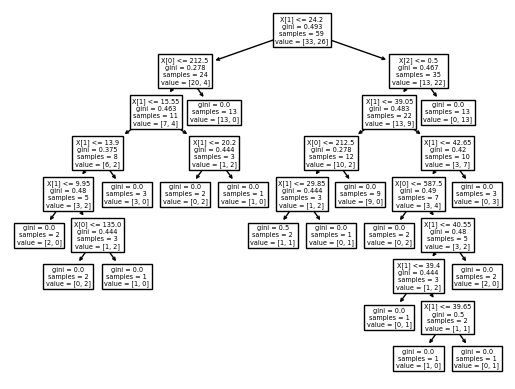

In [64]:
from sklearn.tree import plot_tree

plot_tree(co2_tree)

In [66]:
testPred_tree = co2_tree.predict(test_data[[ "conc", "uptake", "Type"]])

In [67]:
import numpy as np

In [101]:
from sklearn.metrics import confusion_matrix

tbl = pd.crosstab(test_data['Treatment'], testPred_tree)
tbl

col_0,chilled,nonchilled
Treatment,,
chilled,6,5
nonchilled,6,8


In [98]:
from sklearn.metrics import classification_report

print(classification_report(test_data[['Treatment']], testPred_tree))

              precision    recall  f1-score   support

     chilled       0.50      0.55      0.52        11
  nonchilled       0.62      0.57      0.59        14

    accuracy                           0.56        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.56      0.56      0.56        25



In [102]:
CO2 = pd.read_csv("https://peter.butka.website.tuke.sk/res/CO2.csv")

train_data = CO2.sample(frac=0.7)

test_data = CO2.drop(train_data.index)

In [103]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_data[["conc", "uptake"]].values, np.reshape(train_data[["Treatment"]].values, -1))

GaussianNB()

In [104]:
nb_predict = clf.predict(test_data[["conc", "uptake"]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [105]:
from sklearn.metrics import classification_report

print(classification_report(np.reshape(test_data[['Treatment']].values, -1), nb_predict))

              precision    recall  f1-score   support

     chilled       0.73      0.62      0.67        13
  nonchilled       0.64      0.75      0.69        12

    accuracy                           0.68        25
   macro avg       0.69      0.68      0.68        25
weighted avg       0.69      0.68      0.68        25



In [106]:
train_data["conc"] = pd.cut(train_data["conc"], bins = 20, labels=False)
train_data["uptake"] = pd.cut(train_data["uptake"], bins = 20, labels=False)

In [107]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_data[["conc", "uptake"]].values, np.reshape(train_data[["Type"]].values, -1))

GaussianNB()

In [108]:
test_data["conc"] = pd.cut(test_data["conc"], bins = 20, labels=False)
test_data["uptake"] = pd.cut(test_data["uptake"], bins = 20, labels=False)

In [109]:
nb_predict = clf.predict(test_data[["conc", "uptake"]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [110]:
from sklearn.metrics import classification_report

print(classification_report(np.reshape(test_data[['Type']].values, -1), nb_predict))

              precision    recall  f1-score   support

 Mississippi       0.67      0.67      0.67        12
      Quebec       0.69      0.69      0.69        13

    accuracy                           0.68        25
   macro avg       0.68      0.68      0.68        25
weighted avg       0.68      0.68      0.68        25



In [111]:
from sklearn.model_selection import train_test_split

X = CO2[["uptake", "conc"]]
Y = CO2[["Treatment"]]

co2_training, co2_test, co2_trainLabels, co2_testLabels = train_test_split(X, Y, test_size=0.2)

In [119]:
np.reshape(co2_trainLabels.values, -1)

array(['nonchilled', 'nonchilled', 'nonchilled', 'chilled', 'nonchilled',
       'nonchilled', 'nonchilled', 'chilled', 'chilled', 'chilled',
       'nonchilled', 'chilled', 'chilled', 'nonchilled', 'nonchilled',
       'nonchilled', 'chilled', 'nonchilled', 'chilled', 'chilled',
       'nonchilled', 'chilled', 'nonchilled', 'chilled', 'chilled',
       'nonchilled', 'nonchilled', 'nonchilled', 'chilled', 'chilled',
       'chilled', 'nonchilled', 'chilled', 'nonchilled', 'nonchilled',
       'nonchilled', 'nonchilled', 'nonchilled', 'nonchilled', 'chilled',
       'nonchilled', 'chilled', 'chilled', 'chilled', 'nonchilled',
       'nonchilled', 'chilled', 'nonchilled', 'chilled', 'chilled',
       'chilled', 'chilled', 'nonchilled', 'chilled', 'chilled',
       'nonchilled', 'nonchilled', 'chilled', 'nonchilled', 'chilled',
       'chilled', 'nonchilled', 'chilled', 'chilled', 'nonchilled',
       'nonchilled', 'chilled'], dtype=object)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(co2_training, np.reshape(co2_trainLabels.values, -1))

co2_pred = model.predict(co2_test)
co2_pred

array(['chilled', 'chilled', 'chilled', 'chilled', 'nonchilled',
       'chilled', 'chilled', 'chilled', 'chilled', 'chilled', 'chilled',
       'chilled', 'chilled', 'nonchilled', 'nonchilled', 'chilled',
       'chilled'], dtype=object)

In [126]:
pd.crosstab(np.reshape(co2_testLabels.values, -1 ), co2_pred)

col_0,chilled,nonchilled
row_0,,
chilled,9,0
nonchilled,5,3


In [128]:
print(classification_report(co2_testLabels, co2_pred))

              precision    recall  f1-score   support

     chilled       0.64      1.00      0.78         9
  nonchilled       1.00      0.38      0.55         8

    accuracy                           0.71        17
   macro avg       0.82      0.69      0.66        17
weighted avg       0.81      0.71      0.67        17

